# Seaborn Plotting Guide: When to Use Which Plot

This guide will help you decide which type of Seaborn plot to use based on your data visualization needs and analysis goals.

## Table of Contents

- Relational Plots
- Categorical Plots  
- Distribution Plots
- Regression Plots
- Matrix Plots
- Multi-Plot Strategies

## Setup and Sample Data

First, let's import the necessary libraries and create sample data for our demonstrations:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style and figure size
plt.rcParams['figure.figsize'] = (10, 6)
sns.set_style("whitegrid")
sns.set_palette("husl")

In [2]:
# Create comprehensive sample dataset for car data
np.random.seed(42)

n_samples = 200

data = {
    'price': np.random.normal(25000, 8000, n_samples).clip(10000, 50000),
    'horsepower': np.random.normal(150, 40, n_samples).clip(80, 300),
    'city_mpg': np.random.normal(22, 5, n_samples).clip(12, 35),
    'highway_mpg': np.random.normal(28, 6, n_samples).clip(15, 42),
    'curb_weight': np.random.normal(3000, 600, n_samples).clip(2000, 4500),
    'engine_size': np.random.normal(2.5, 0.8, n_samples).clip(1.0, 5.0),
    'fuel_type': np.random.choice(['gasoline', 'diesel', 'hybrid'], n_samples, p=[0.7, 0.2, 0.1]),
    'body_style': np.random.choice(['sedan', 'hatchback', 'suv', 'coupe'], n_samples, p=[0.4, 0.3, 0.2, 0.1]),
    'drive_wheels': np.random.choice(['fwd', 'rwd', 'awd'], n_samples, p=[0.5, 0.3, 0.2]),
    'make': np.random.choice(['Toyota', 'Honda', 'Ford', 'BMW', 'Audi'], n_samples, p=[0.3, 0.25, 0.2, 0.15, 0.1])
}

# Create some correlations to make the data more realistic
for i in range(n_samples):
    # Higher horsepower typically means higher price and lower mpg
    if data['horsepower'][i] > 200:
        data['price'][i] *= 1.3
        data['city_mpg'][i] *= 0.8
        data['highway_mpg'][i] *= 0.85
    
    # SUVs tend to be more expensive and less fuel efficient
    if data['body_style'][i] == 'suv':
        data['price'][i] *= 1.2
        data['city_mpg'][i] *= 0.85
        data['curb_weight'][i] *= 1.15
    
    # Luxury brands tend to be more expensive
    if data['make'][i] in ['BMW', 'Audi']:
        data['price'][i] *= 1.4

df = pd.DataFrame(data)

# Round numeric columns appropriately
df['price'] = df['price'].round(0).astype(int)
df['horsepower'] = df['horsepower'].round(0).astype(int)
df['city_mpg'] = df['city_mpg'].round(1)
df['highway_mpg'] = df['highway_mpg'].round(1)
df['curb_weight'] = df['curb_weight'].round(0).astype(int)
df['engine_size'] = df['engine_size'].round(1)

print("Sample dataset created:")
print(f"Shape: {df.shape}")
df.head()

Sample dataset created:
Shape: (200, 10)


,price,horsepower,city_mpg,highway_mpg,curb_weight,engine_size,fuel_type,body_style,drive_wheels,make
0,34768,164,11.9,32.5,4097,3.6,gasoline,suv,fwd,Honda
1,33451,172,19.0,22.5,2690,3.2,gasoline,sedan,fwd,BMW
2,30182,193,22.0,33.2,3058,2.5,hybrid,hatchback,fwd,Honda
3,37184,192,22.2,36.1,2723,2.0,gasoline,sedan,fwd,Toyota
4,23127,95,19.7,30.5,2739,3.1,diesel,sedan,rwd,Ford


## Relational Plots

### Scatterplot (`sns.scatterplot`)

**When to use:**
- Visualize relationship between two continuous variables
- Detect patterns, correlations, clusters, or outliers
- Examine how a third variable affects the relationship (using hue)
- Analyze multi-dimensional relationships (using size, style)

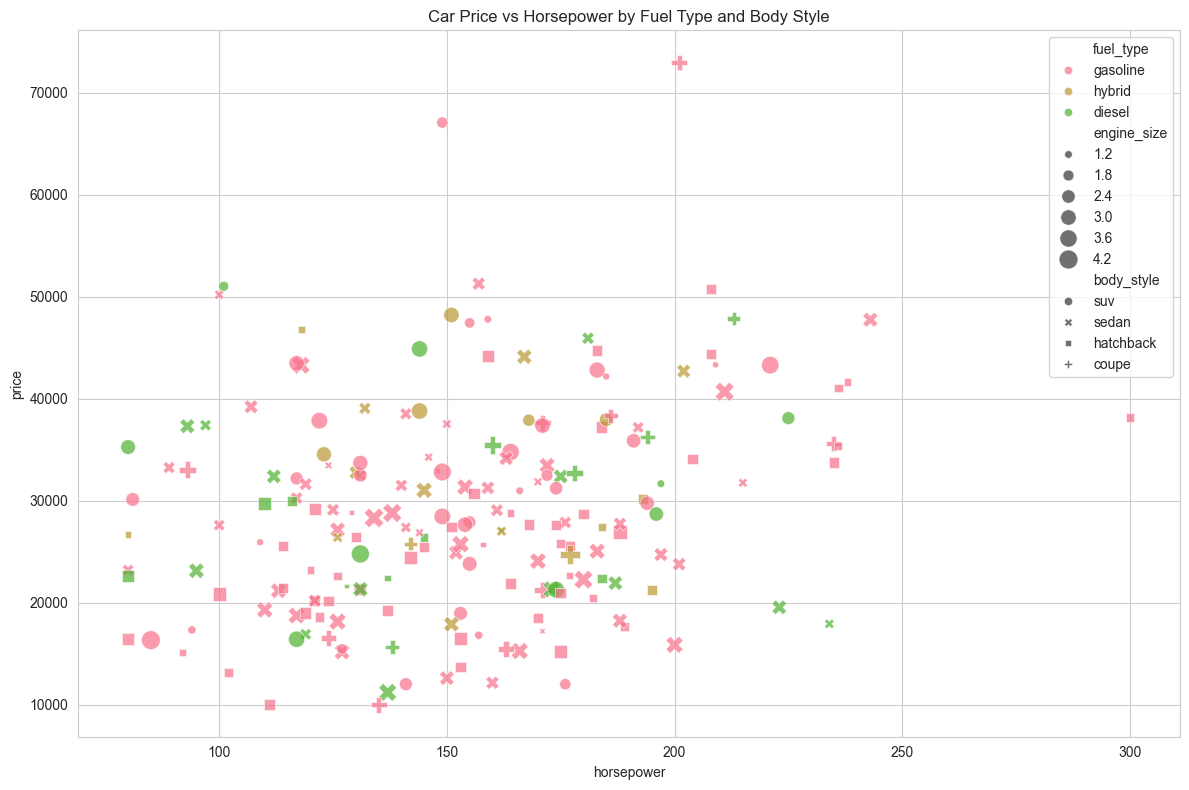

In [3]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='horsepower',
    y='price',
    hue='fuel_type',      # Color by categorical variable
    size='engine_size',   # Point size by variable
    style='body_style',   # Different markers by category
    alpha=0.7,            # Transparency
    sizes=(20, 200),      # Range of point sizes
    data=df
)
plt.title('Car Price vs Horsepower by Fuel Type and Body Style')
plt.tight_layout()
plt.show()

### Lineplot (`sns.lineplot`)

**When to use:**
- Show trends over time or ordered categories
- Compare multiple time series or trends
- Visualize aggregated data with confidence intervals
- Display changes in a continuous variable across ordered categories

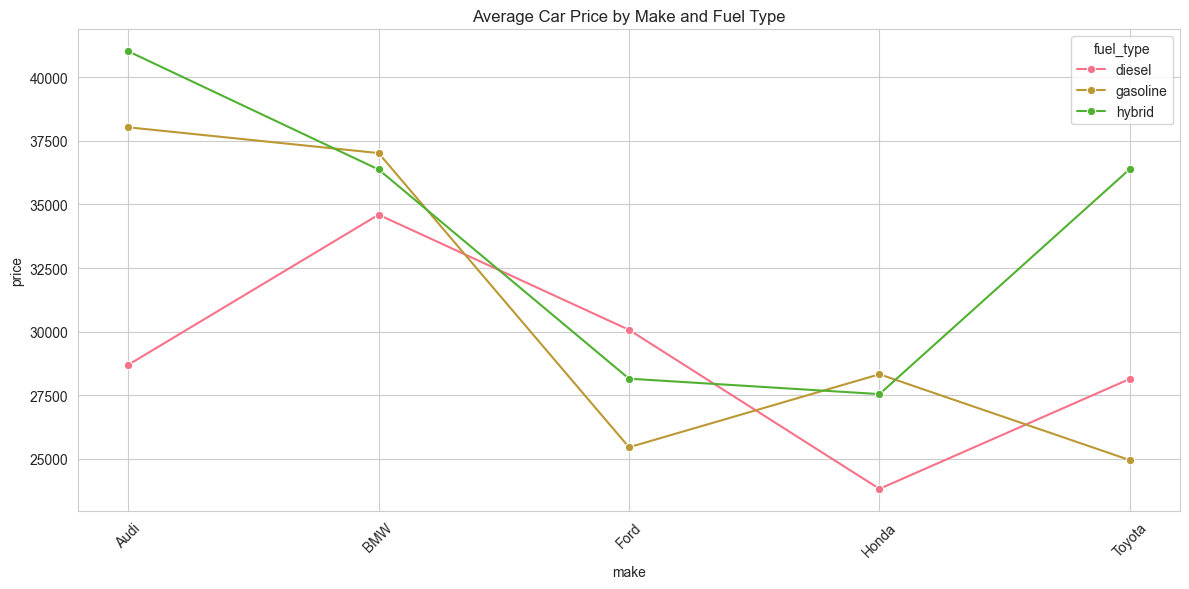

In [4]:
# Group by make to get mean prices
grouped_data = df.groupby(['make', 'fuel_type'])['price'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(
    x='make',
    y='price',
    hue='fuel_type',      # Separate lines by fuel type
    marker='o',           # Add markers at data points
    data=grouped_data
)
plt.title('Average Car Price by Make and Fuel Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Categorical Plots

### Barplot (`sns.barplot`)

**When to use:**
- Compare quantities across categories
- Show summary statistics (mean, median, etc.) with error bars
- Visualize categorical data with a single numeric variable
- Compare groups or subgroups (using hue)

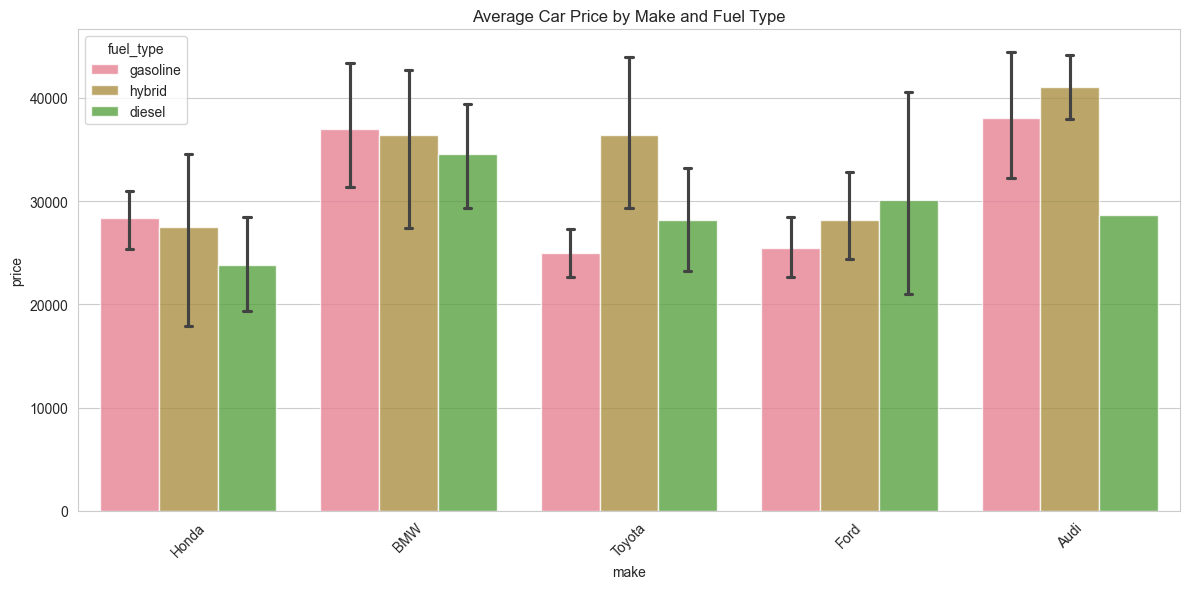

In [5]:
plt.figure(figsize=(12, 6))
sns.barplot(
    x='make',
    y='price',
    hue='fuel_type',      # Separate bars by category
    errorbar=('ci', 95),  # Error bars with 95% CI
    capsize=0.1,          # Size of error bar caps
    alpha=0.8,            # Transparency
    data=df
)
plt.title('Average Car Price by Make and Fuel Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Countplot (`sns.countplot`)

**When to use:**
- Show frequency of categories
- Compare distribution across categories
- Display categorical data count
- Analyze class distribution or balance

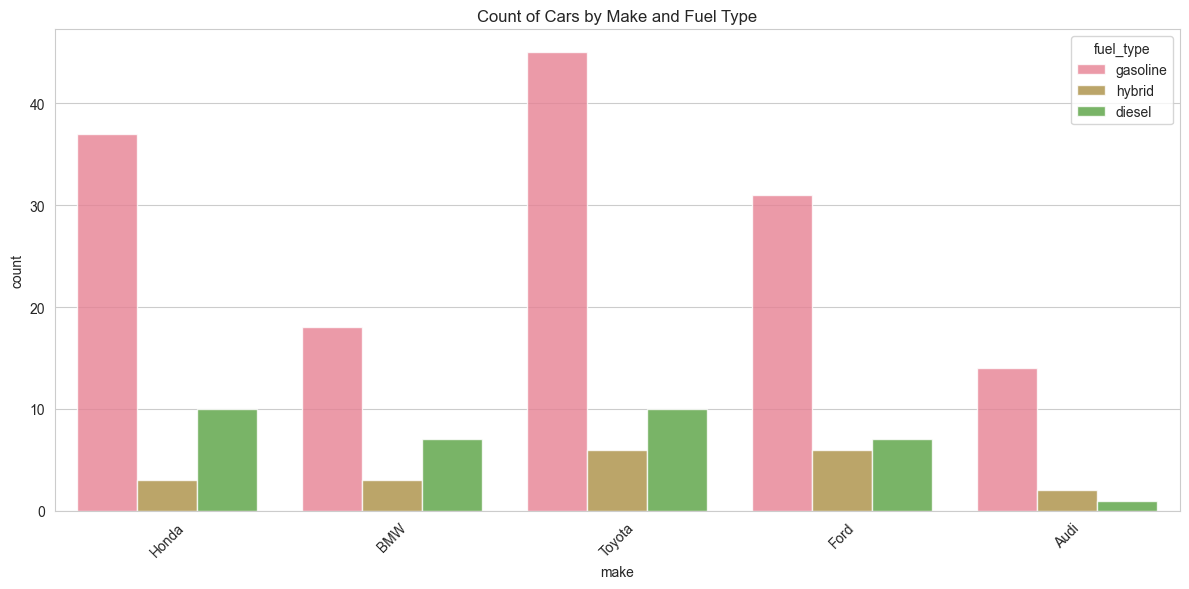

In [6]:
plt.figure(figsize=(12, 6))
sns.countplot(
    x='make',
    hue='fuel_type',     # Separate counts by category
    alpha=0.8,           # Transparency
    dodge=True,          # Whether to dodge grouped bars
    data=df
)
plt.title('Count of Cars by Make and Fuel Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Boxplot (`sns.boxplot`)

**When to use:**
- Show distribution of numerical data across categories
- Identify outliers within categories
- Compare distributions between groups
- Visualize median, quartiles, and range

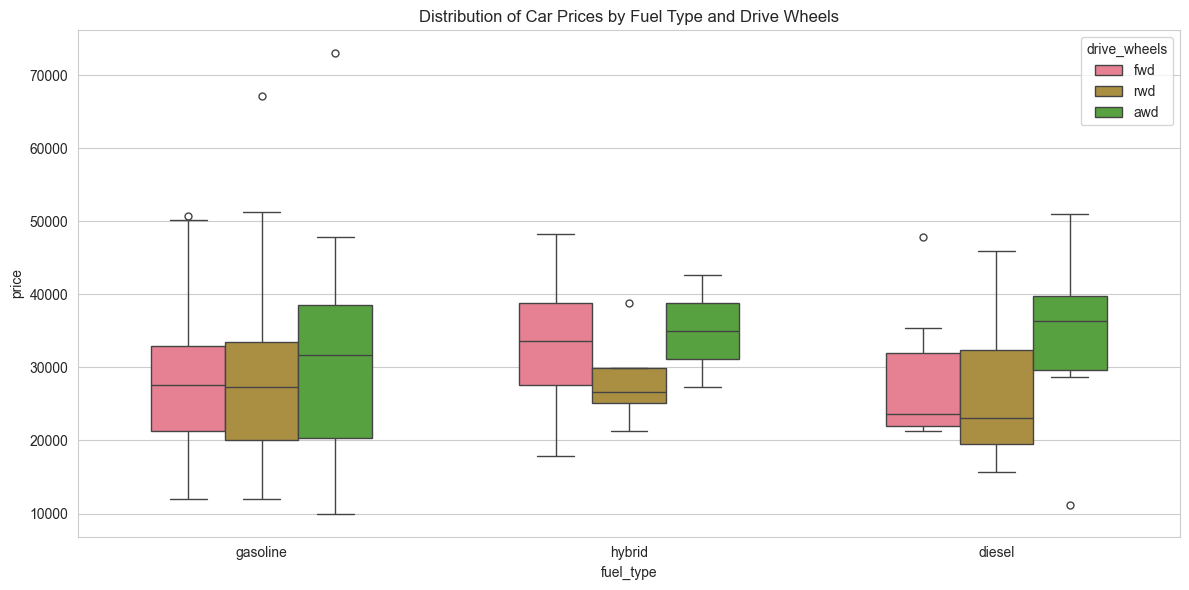

In [7]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    x='fuel_type',
    y='price',
    hue='drive_wheels',   # Separate boxes by category
    width=0.6,            # Box width
    fliersize=5,          # Size of outlier points
    dodge=True,           # Whether to dodge grouped boxes
    data=df
)
plt.title('Distribution of Car Prices by Fuel Type and Drive Wheels')
plt.tight_layout()
plt.show()

### Violinplot (`sns.violinplot`)

**When to use:**
- Show full distribution shape across categories
- Compare distribution density across groups
- Visualize bimodal or complex distributions
- Show more detail than a boxplot when sample size is large

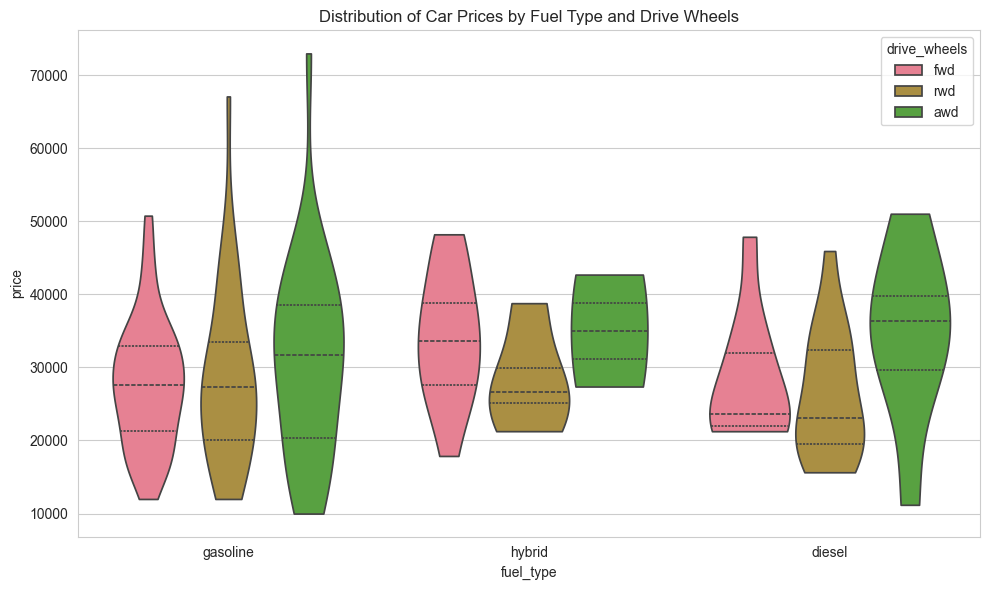

In [8]:
plt.figure(figsize=(10, 6))
sns.violinplot(
    x='fuel_type',
    y='price',
    hue='drive_wheels',   # Separate violins by category
    split=False,          # Split violins for better comparison
    inner='quartile',     # Inner visualization
    cut=0,                # How far to extend density past observed data
    data=df
)
plt.title('Distribution of Car Prices by Fuel Type and Drive Wheels')
plt.tight_layout()
plt.show()

## Distribution Plots

### Histplot (`sns.histplot`)

**When to use:**
- Visualize distribution of a single variable
- Examine frequency or density across values
- Check for normality, skewness, or multiple modes
- Compare distributions across categories (using hue)

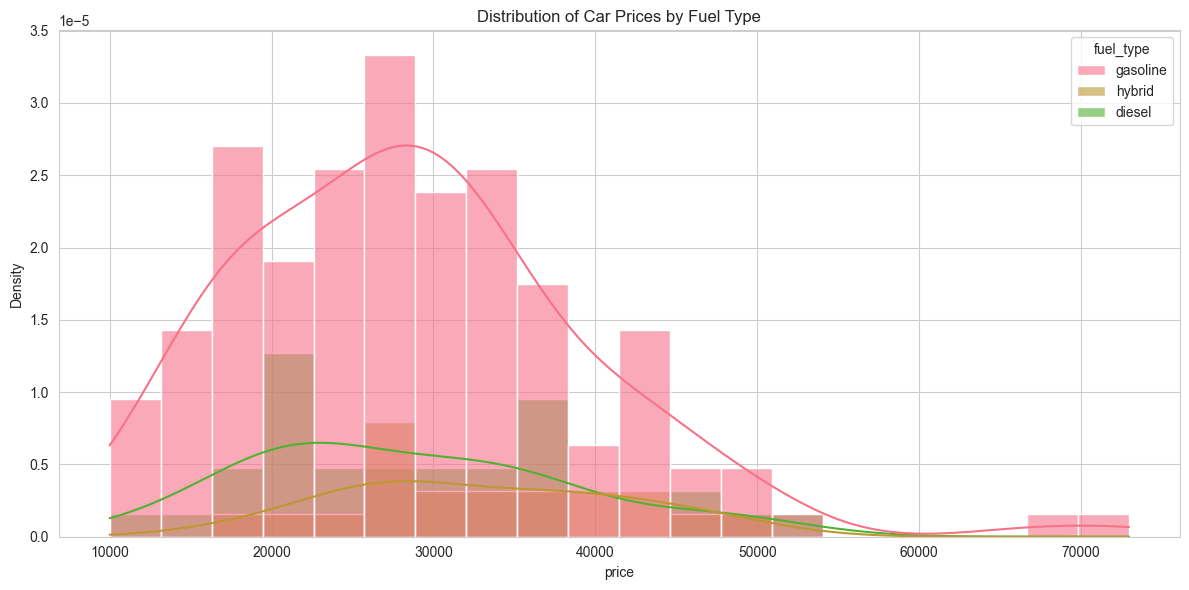

In [9]:
plt.figure(figsize=(12, 6))
sns.histplot(
    x='price',
    hue='fuel_type',      # Separate histograms by category
    kde=True,             # Add density curve
    bins=20,              # Number of bins
    alpha=0.6,            # Transparency
    multiple='layer',     # How multiple distributions are shown
    stat='density',       # Statistic to compute
    data=df
)
plt.title('Distribution of Car Prices by Fuel Type')
plt.tight_layout()
plt.show()

### KDEPlot (`sns.kdeplot`)

**When to use:**
- Visualize smooth density estimation
- Focus on distribution shape rather than counts
- Compare multiple distributions
- Create cleaner visualizations without bin edge artifacts

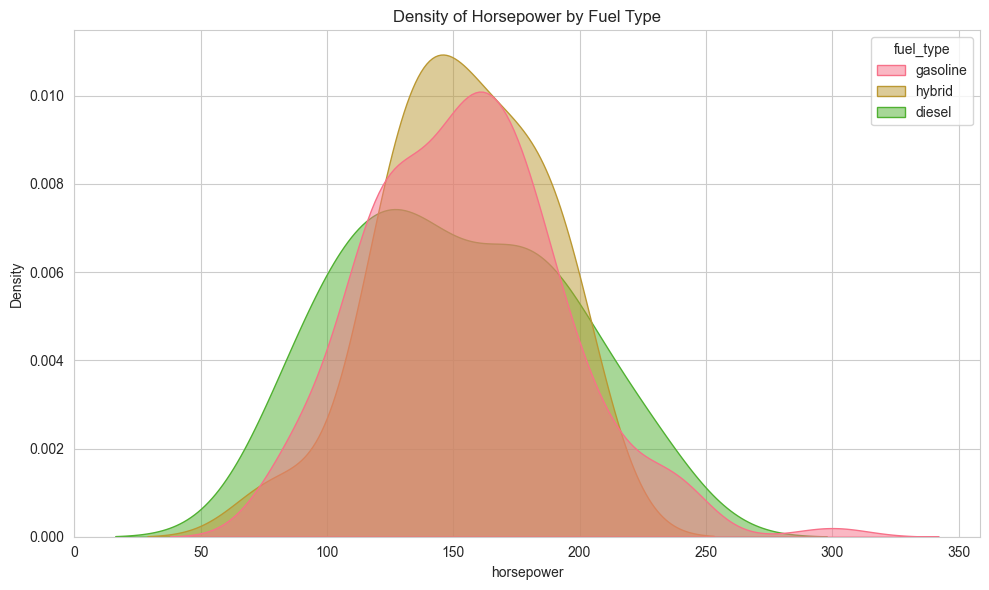

In [10]:
plt.figure(figsize=(10, 6))
sns.kdeplot(
    x='horsepower',
    hue='fuel_type',      # Separate densities by category
    fill=True,            # Fill the density curves
    alpha=0.5,            # Transparency
    common_norm=False,    # Whether to normalize densities together
    multiple='layer',     # How multiple distributions are shown
    data=df
)
plt.title('Density of Horsepower by Fuel Type')
plt.tight_layout()
plt.show()

## Regression Plots

### Regplot (`sns.regplot`)

**When to use:**
- Show relationship with regression line
- Visualize linear correlation between two variables
- Focus on a single relationship without categories
- Add confidence intervals to regression

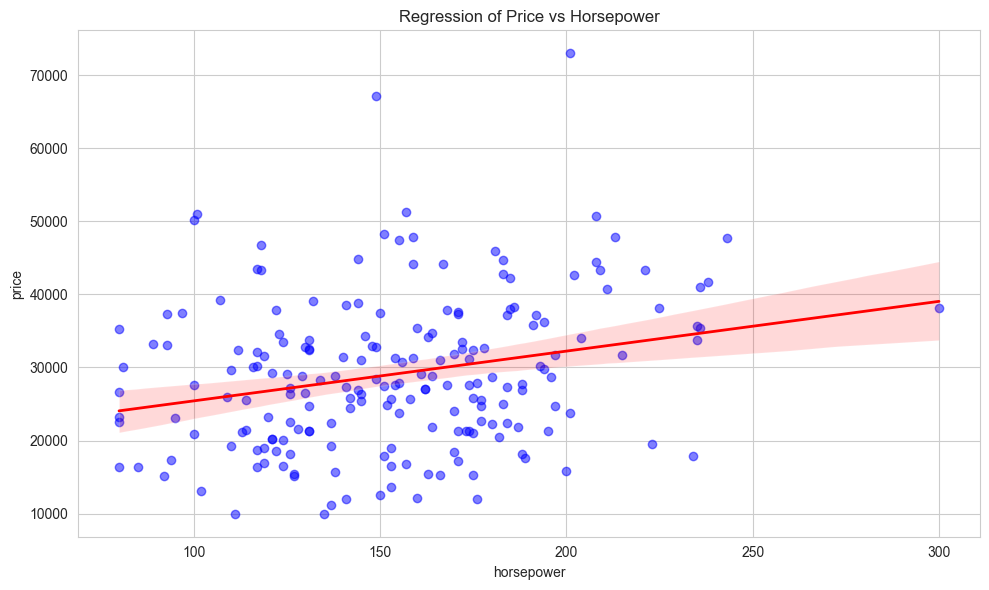

In [11]:
plt.figure(figsize=(10, 6))
sns.regplot(
    x='horsepower',
    y='price',
    data=df,
    scatter_kws={'alpha': 0.5, 'color': 'blue'},  # Customize scatter plot
    line_kws={'color': 'red', 'linewidth': 2},    # Customize regression line
    marker='o',           # Point marker style
    ci=95,                # Confidence interval for regression
)
plt.title('Regression of Price vs Horsepower')
plt.tight_layout()
plt.show()

### Lmplot (`sns.lmplot`)

**When to use:**
- Create facetted regression plots
- Compare relationships across different subgroups
- Visualize how a relationship varies across categories
- Create complex multi-panel regression visualizations

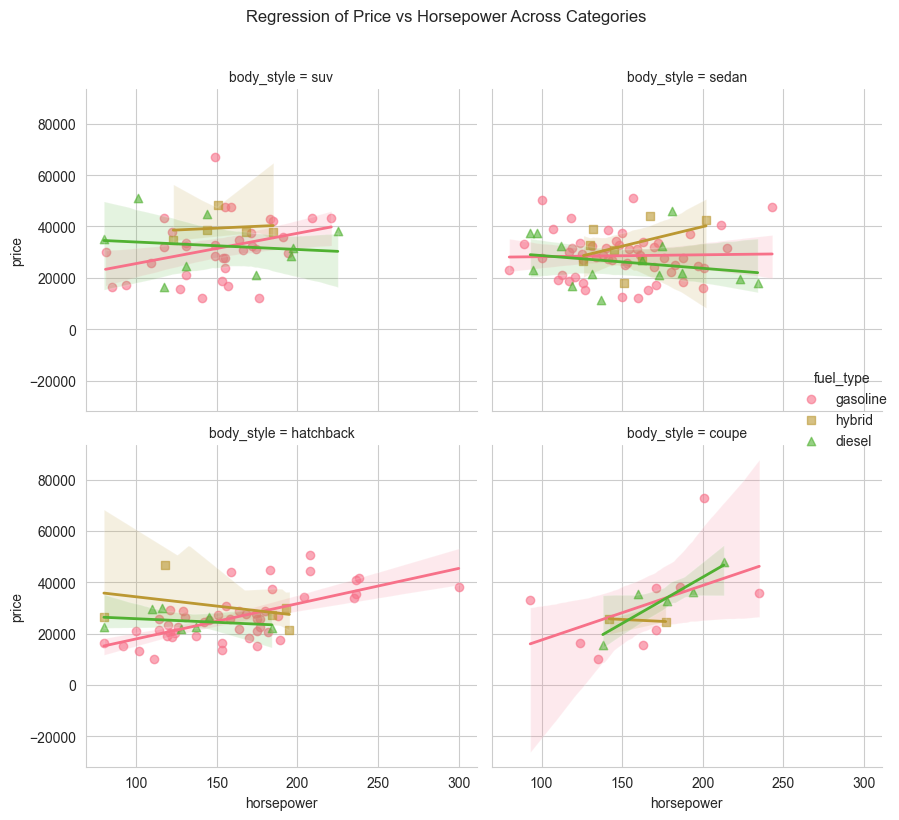

In [12]:
sns.lmplot(
    x='horsepower',
    y='price',
    hue='fuel_type',      # Separate by category
    col='body_style',     # Create column facets by category
    height=4,             # Height of each facet
    aspect=1,             # Aspect ratio of each facet
    markers=['o', 's', '^'],   # Different markers for categories
    scatter_kws={'alpha': 0.6},  # Customize scatter plot
    line_kws={'linewidth': 2},   # Customize regression line
    col_wrap=2,           # Number of facet columns
    data=df
)
plt.suptitle('Regression of Price vs Horsepower Across Categories', y=1.02)
plt.tight_layout()
plt.show()

## Matrix Plots

### Heatmap (`sns.heatmap`)

**When to use:**
- Visualize correlation matrices
- Show patterns in 2D data
- Display values in a color-encoded matrix
- Highlight relationships between many variables at once

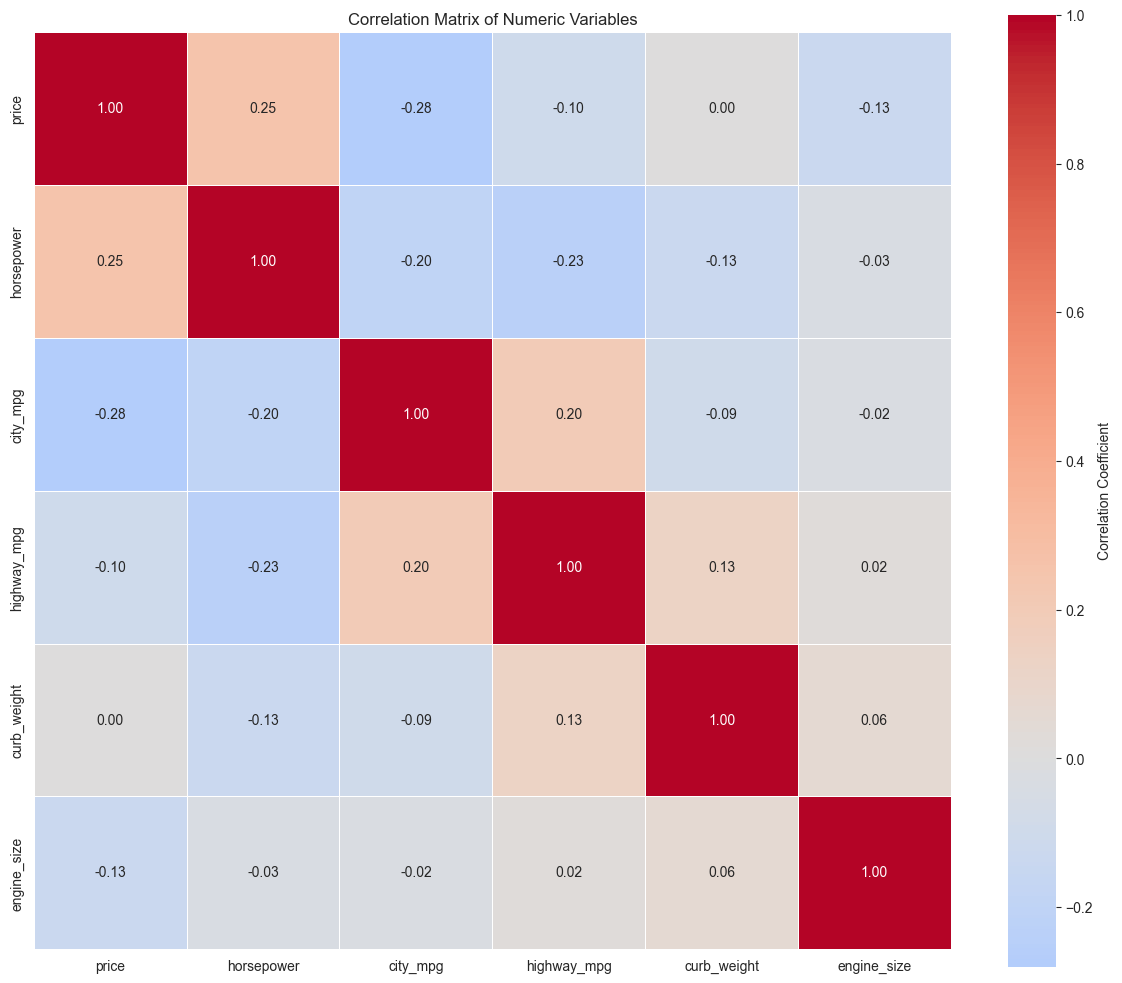

In [13]:
# Create correlation matrix
corr_matrix = df.select_dtypes(include=['number']).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix,
    annot=True,           # Show values in cells
    cmap='coolwarm',      # Color map
    fmt='.2f',            # Format for annotations
    linewidths=0.5,       # Width of cell borders
    cbar_kws={'label': 'Correlation Coefficient'},  # Colorbar customization
    center=0,             # Value at center of colormap
    square=True,          # Force cells to be square
)
plt.title('Correlation Matrix of Numeric Variables')
plt.tight_layout()
plt.show()

## Multi-Plot Strategies

### PairPlot (`sns.pairplot`)

**When to use:**
- Explore relationships between multiple variables at once
- Create a matrix of scatterplots for all variable combinations
- See correlations and distributions across many variables
- Get a comprehensive overview of your dataset

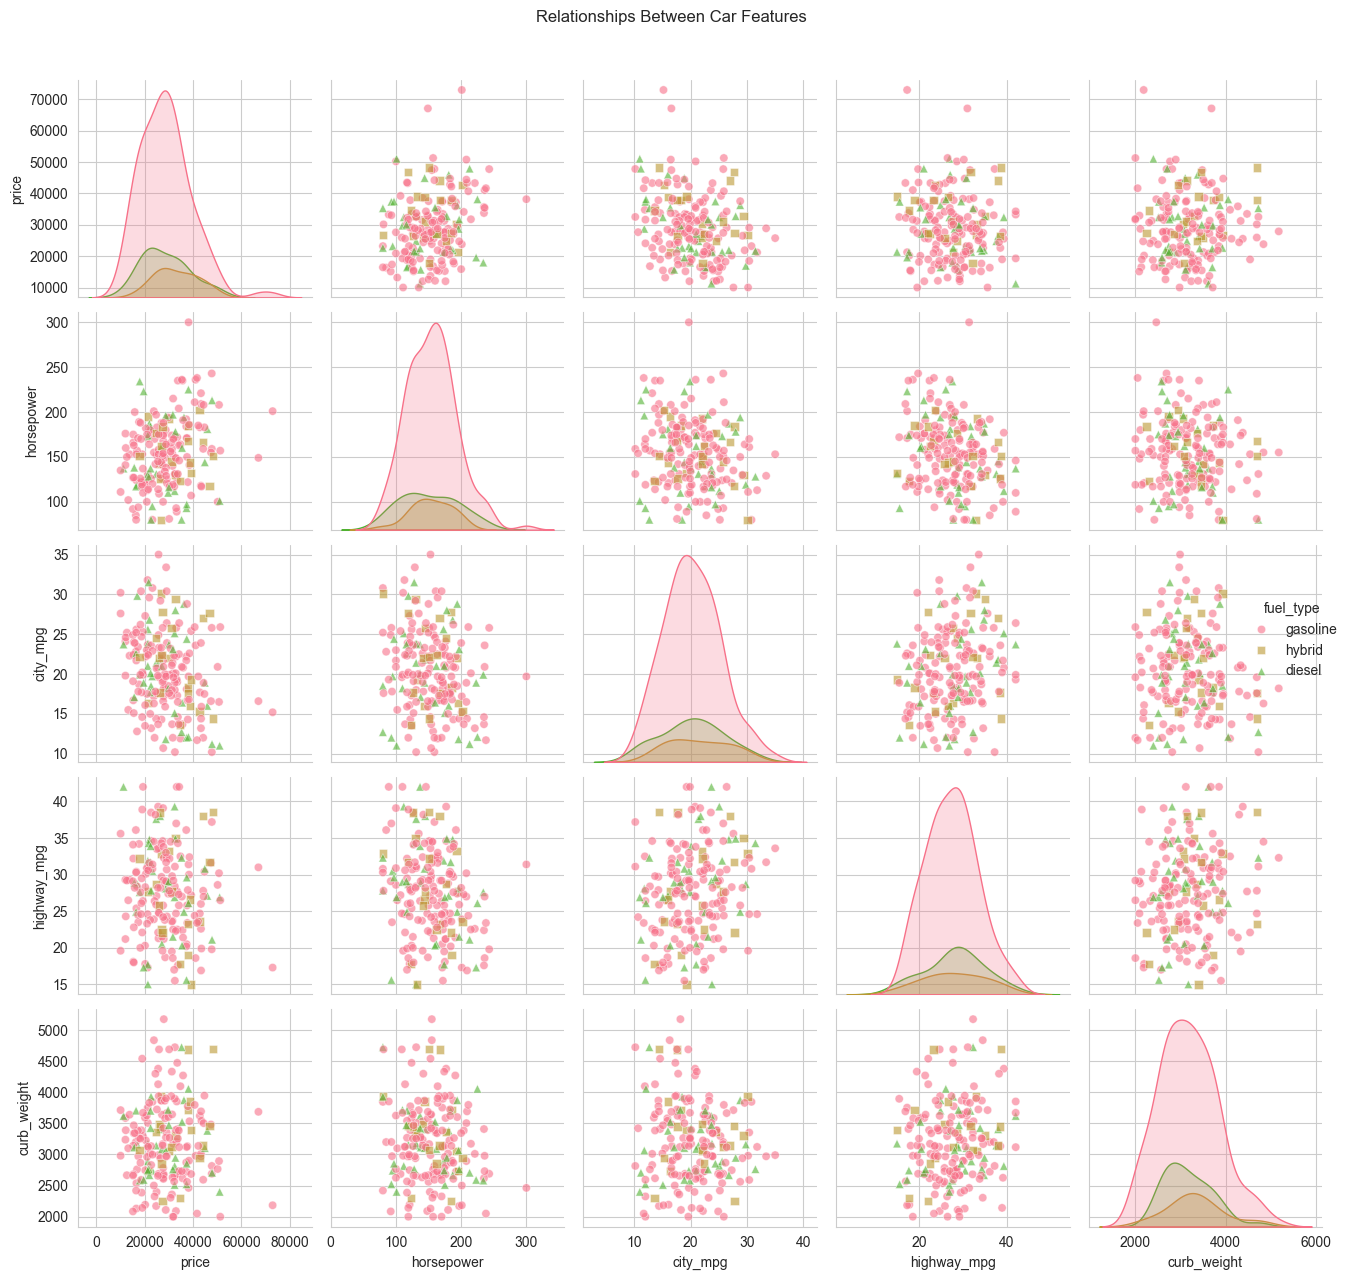

In [14]:
# Select a subset of numeric columns for clarity
cols = ['price', 'horsepower', 'city_mpg', 'highway_mpg', 'curb_weight']

sns.pairplot(
    df[cols + ['fuel_type']],
    hue='fuel_type',      # Color by category
    diag_kind='kde',      # Type of plot on diagonal ('hist' or 'kde')
    markers=['o', 's', '^'],   # Marker style by hue
    plot_kws={'alpha': 0.6}  # Kwargs for the underlying plot
)
plt.suptitle('Relationships Between Car Features', y=1.02)
plt.tight_layout()
plt.show()

### FacetGrid
Create multiple subplots based on categorical variables:

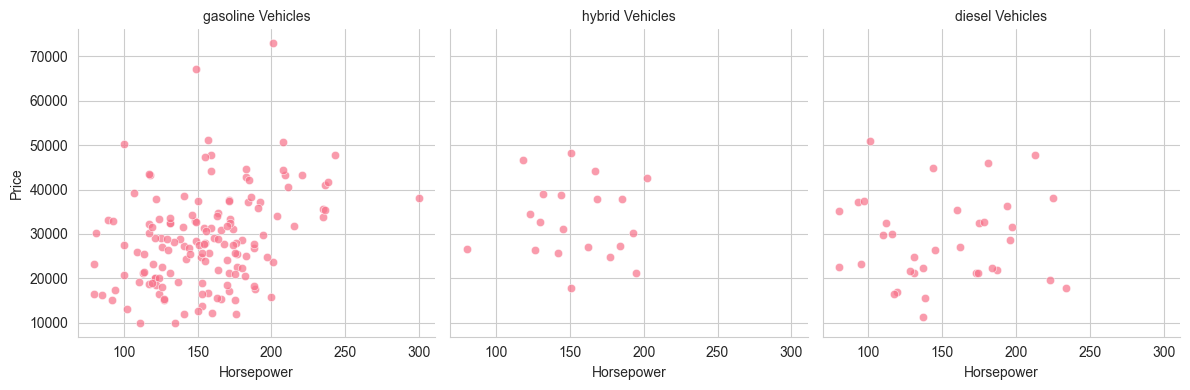

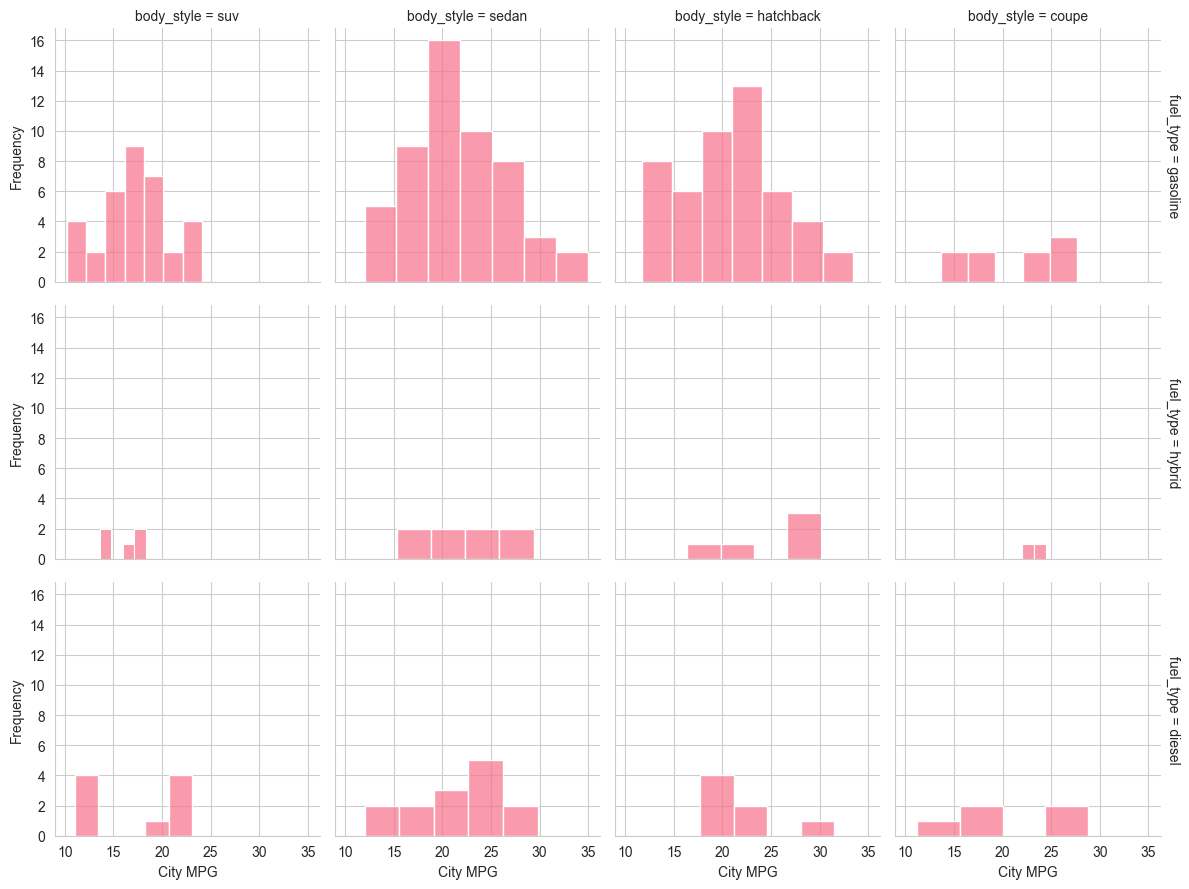

In [15]:
# Create a FacetGrid based on fuel type
grid = sns.FacetGrid(df, col='fuel_type', height=4)
grid.map(sns.scatterplot, 'horsepower', 'price', alpha=0.7)
grid.set_axis_labels('Horsepower', 'Price')
grid.set_titles('{col_name} Vehicles')
plt.tight_layout()
plt.show()

# Or with more complexity
grid = sns.FacetGrid(df, col='body_style', row='fuel_type', margin_titles=True)
grid.map(sns.histplot, 'city_mpg', alpha=0.7)
grid.set_axis_labels('City MPG', 'Frequency')
plt.tight_layout()
plt.show()

### Multiple Subplots with plt.subplots()
For more control over subplot arrangement:

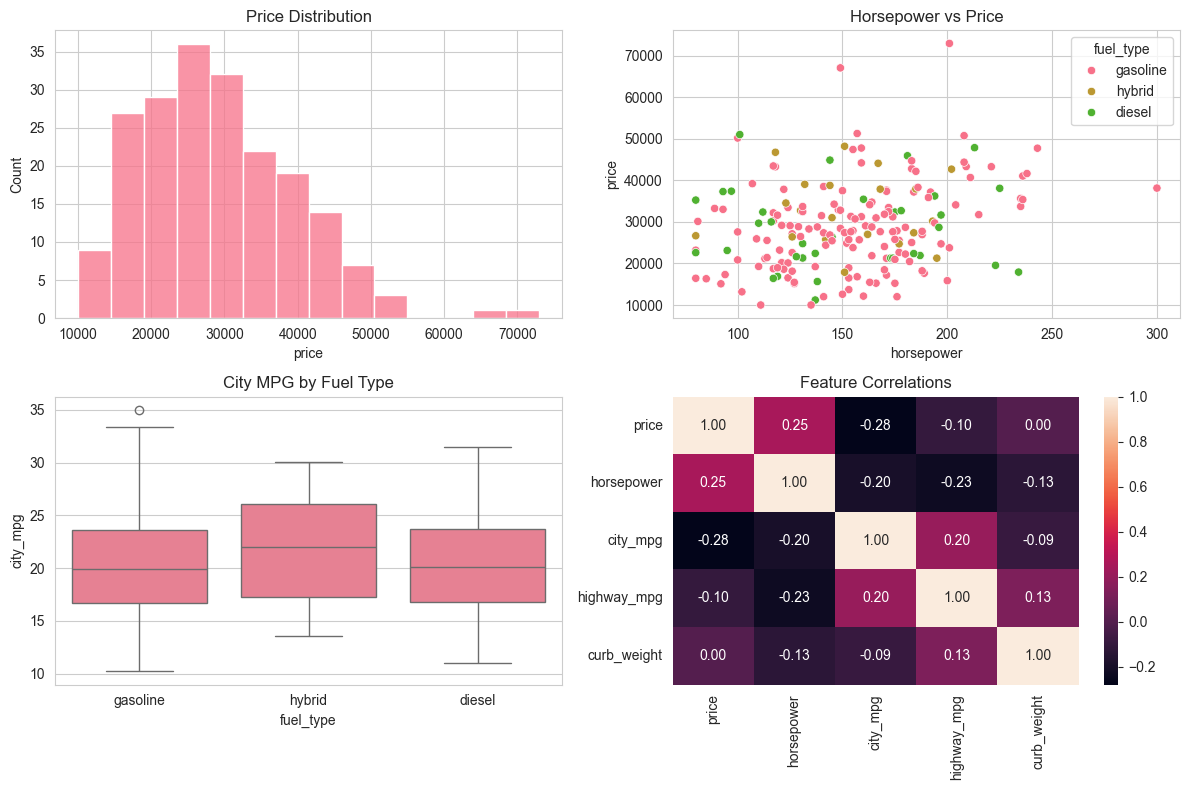

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Top left: Price distribution
sns.histplot(df['price'], ax=axes[0,0])
axes[0,0].set_title('Price Distribution')

# Top right: Horsepower vs Price
sns.scatterplot(data=df, x='horsepower', y='price', hue='fuel_type', ax=axes[0,1])
axes[0,1].set_title('Horsepower vs Price')

# Bottom left: MPG comparison
sns.boxplot(data=df, x='fuel_type', y='city_mpg', ax=axes[1,0])
axes[1,0].set_title('City MPG by Fuel Type')

# Bottom right: Correlation heatmap
corr_data = df[['price', 'horsepower', 'city_mpg', 'highway_mpg', 'curb_weight']].corr()
sns.heatmap(corr_data, annot=True, ax=axes[1,1], fmt='.2f')
axes[1,1].set_title('Feature Correlations')

plt.tight_layout()
plt.show()

## Quick Plot Selection Guide

### For Relationships Between Variables:
- **Two Continuous**: `scatterplot()`, `regplot()`, `lmplot()`
- **Continuous vs Categorical**: `boxplot()`, `violinplot()`, `stripplot()`
- **Two Categorical**: `countplot()`, `heatmap()` with crosstab

### For Distributions:
- **Single Variable**: `histplot()`, `kdeplot()`, `distplot()`
- **Multiple Categories**: `histplot()` with hue, `kdeplot()` with hue

### For Comparisons:
- **Categories**: `barplot()`, `countplot()`
- **Groups**: `boxplot()`, `violinplot()`

### For Correlations:
- **All Variables**: `heatmap()` with correlation matrix
- **Pairwise**: `pairplot()`

### For Time Series:
- **Over Time**: `lineplot()` with x as time variable

## Common Parameters and Customization

### Universal Parameters:
- `data`: DataFrame to use
- `x`, `y`: Column names for axes
- `hue`: Variable for color coding
- `size`: Variable for point sizes
- `style`: Variable for marker styles
- `palette`: Color palette to use
- `alpha`: Transparency (0-1)

### Style Tips:
```python
# Set overall style
sns.set_style("whitegrid")
sns.set_palette("viridis")

# Custom color palettes
sns.color_palette("husl", 8)
sns.color_palette(["#FF6B6B", "#4ECDC4", "#45B7D1"])

# Figure size
plt.figure(figsize=(10, 6))

# Remove spines
sns.despine()
```

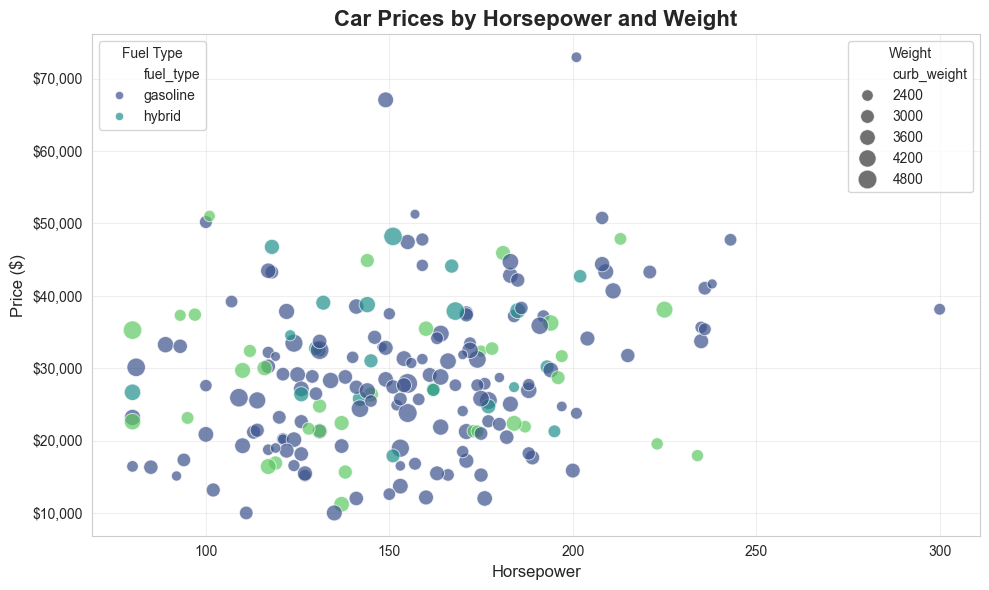

In [17]:
# Example of customized plot
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Create the plot
ax = sns.scatterplot(
    data=df, 
    x='horsepower', 
    y='price',
    hue='fuel_type',
    size='curb_weight',
    sizes=(50, 200),
    alpha=0.7,
    palette='viridis'
)

# Customize
ax.set_title('Car Prices by Horsepower and Weight', fontsize=16, fontweight='bold')
ax.set_xlabel('Horsepower', fontsize=12)
ax.set_ylabel('Price ($)', fontsize=12)

# Format y-axis as currency
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Add grid
ax.grid(True, alpha=0.3)

# Adjust legend
handles, labels = ax.get_legend_handles_labels()
legend1 = ax.legend(handles[:3], labels[:3], title="Fuel Type", loc='upper left')
legend2 = ax.legend(handles[4:], labels[4:], title="Weight", loc='upper right')
ax.add_artist(legend1)

plt.tight_layout()
plt.show()

## Summary

This notebook provides a comprehensive overview of Seaborn's plotting capabilities. Key takeaways:

1. **Choose the right plot type** based on your data types and analysis goals
2. **Use categorical plots** for comparing groups and categories
3. **Use relational plots** for exploring relationships between continuous variables
4. **Use distribution plots** to understand data spread and shape
5. **Combine multiple plots** using FacetGrid or subplots for comprehensive analysis
6. **Customize extensively** using palettes, styles, and matplotlib integration

### Next Steps:
- Experiment with your own datasets
- Combine different plot types for comprehensive EDA
- Explore Seaborn's object interface (v0.12+) for more flexibility
- Check the official documentation for advanced features

Happy plotting! 📊